In [8]:
#Q2 How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture ?


import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model with a ResNet50-FPN backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)  # Set pretrained=False if you don't want pre-trained weights

# Set the model to evaluation mode
model.eval()

# Print the model architecture
print(model)






C:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\rahul/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|███████████████████████████████████████████████████████████████████████████████| 160M/160M [00:25<00

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

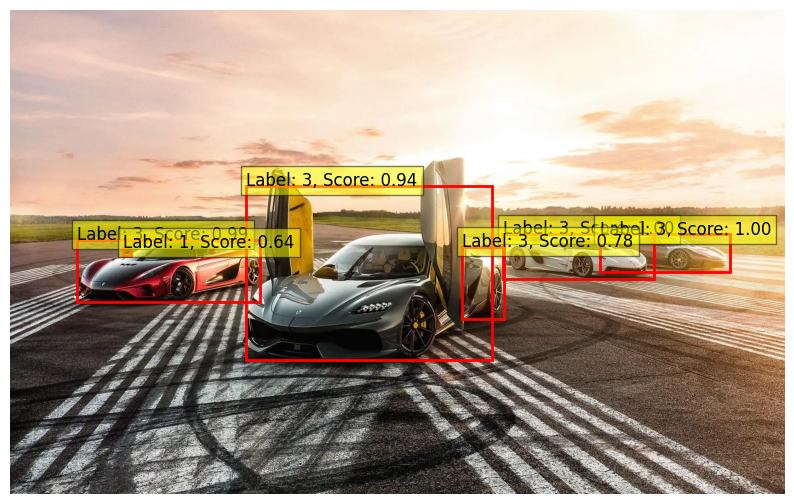

In [34]:
#Q3 How do you perform inference on an online image using the Faster RCNN model and print the predictions?

import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Load the Faster R-CNN model with a ResNet50-FPN backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# URL of the online image (replace with your image URL)
image_url = "https://di-uploads-pod25.dealerinspire.com/koenigseggflorida/uploads/2019/08/Koenigsegg_TheSquad_3200x2000-UPDATED.jpg"  # Example image URL

# Load the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Transform the image to tensor and normalize
image_tensor = F.to_tensor(img).unsqueeze(0)  # Add a batch dimension

# Perform inference on the image
with torch.no_grad():  # Disable gradient calculation for inference
    predictions = model(image_tensor)  # Run inference

# Set a threshold for displaying bounding boxes
threshold = 0.5

# Create a figure to display the results
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Process predictions and draw bounding boxes
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].numpy()
    label = predictions[0]['labels'][i].item()
    score = predictions[0]['scores'][i].item()
    
    if score > threshold:  # Only consider predictions with a score above the threshold
        # Draw bounding box
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                            fill=False, color='red', linewidth=2))
        plt.text(box[0], box[1], f'Label: {label}, Score: {score:.2f}',
                 bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

# Show the plot with bounding boxes
plt.axis('off')
plt.show()





0: 416x640 4 cars, 1 airplane, 53.5ms
Speed: 3.0ms preprocess, 53.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


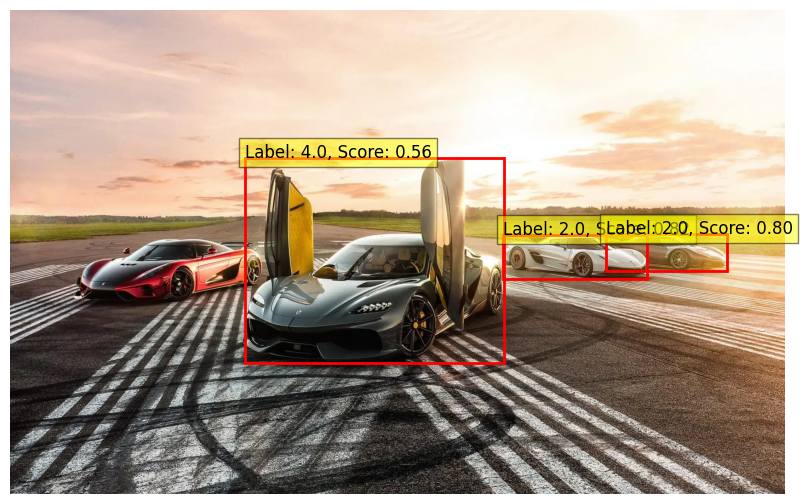

'result.jpg'

In [28]:
#Q4  How do you load an image and perform inference using YOLOv9, then display the detected objects with bounding boxes and class labels6

# Import necessary libraries
from ultralytics import YOLO
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Load a pretrained YOLOv9 model (you can use 'yolov9n.pt' or your own trained model)
model = YOLO("yolov8n.pt")  # Ensure that the model file exists in your directory

# URL of the online image (replace with your image URL)
image_url = "https://di-uploads-pod25.dealerinspire.com/koenigseggflorida/uploads/2019/08/Koenigsegg_TheSquad_3200x2000-UPDATED.jpg"  # Example image URL

# Load the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Perform inference on the image
results = model.predict(img)  # This returns a list of Results objects

# Create a figure to display the results
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Process predictions and draw bounding boxes
for result in results:
    boxes = result.boxes.xyxy  # Get bounding boxes
    scores = result.boxes.conf  # Get scores
    labels = result.boxes.cls  # Get labels

    for i in range(len(boxes)):
        box = boxes[i].numpy()  # Get box coordinates
        score = scores[i].item()  # Get score
        label = labels[i].item()  # Get label
        
        if score > 0.5:  # Only consider predictions with a score above 0.5
            # Draw bounding box
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                                fill=False, color='red', linewidth=2))
            plt.text(box[0], box[1], f'Label: {label}, Score: {score:.2f}',
                     bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

# Show the plot with bounding boxes
plt.axis('off')
plt.show()

# Optionally, save the result to disk
results[0].save(filename="result.jpg")  # Save the annotated image from the first result object if needed








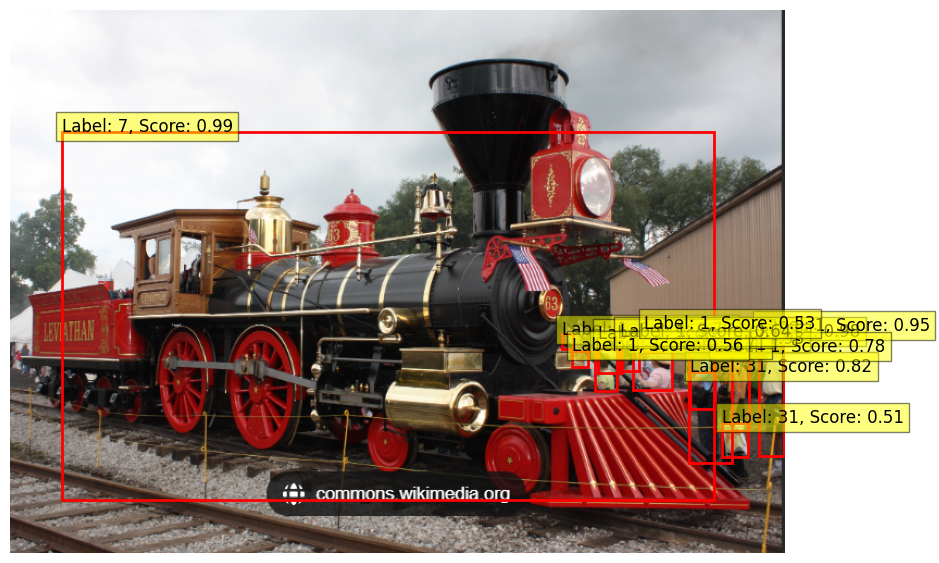

In [18]:
#Q5 How do you display bounding boxes for the detected objects in an image using Faster RCNN?

import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Load the Faster R-CNN model with a ResNet50-FPN backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  

image_url = "Screenshot 2024-02-16 224952.png"  


img = Image.open(image_url).convert("RGB")


image_tensor = F.to_tensor(img).unsqueeze(0)  


with torch.no_grad():  
    predictions = model(image_tensor)


threshold = 0.5
plt.figure(figsize=(10, 10))
plt.imshow(img)


for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].numpy()
    label = predictions[0]['labels'][i].item()
    score = predictions[0]['scores'][i].item()
    
    if score > threshold:  
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                            fill=False, color='red', linewidth=2))
        plt.text(box[0], box[1], f'Label: {label}, Score: {score:.2f}',
                 bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')
plt.axis('off')
plt.show()


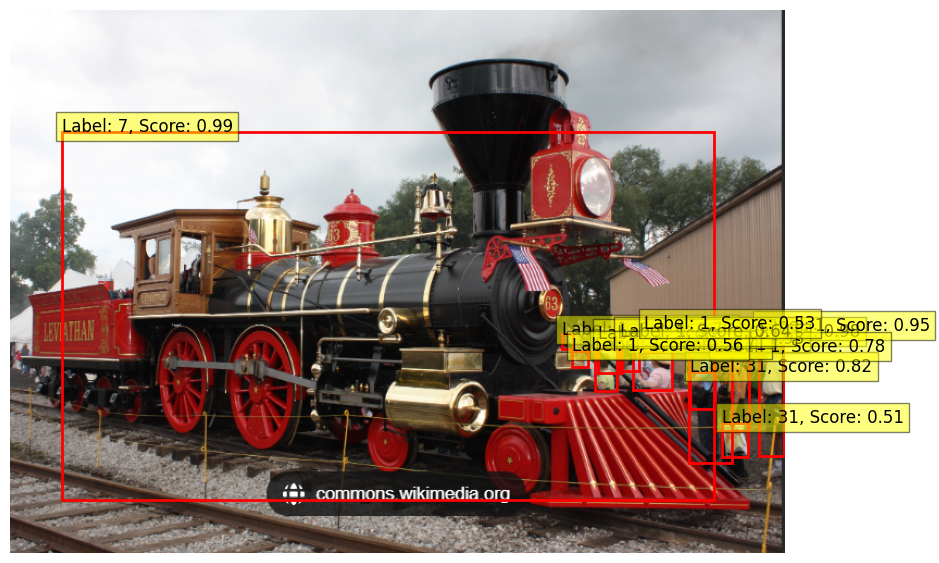

In [39]:
#Q6 How do you perform inference on a local image using Faster RCNN?

import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  

image_path = "Screenshot 2024-02-16 224952.png"
img = Image.open(image_path).convert("RGB")

image_tensor = F.to_tensor(img).unsqueeze(0)  
with torch.no_grad():  
    predictions = model(image_tensor)  

threshold = 0.5

plt.figure(figsize=(10, 10))
plt.imshow(img)

for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].numpy()
    label = predictions[0]['labels'][i].item()
    score = predictions[0]['scores'][i].item()
    
    if score > threshold:  
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                            fill=False, color='red', linewidth=2))
        plt.text(box[0], box[1], f'Label: {label}, Score: {score:.2f}',
                 bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')


plt.axis('off')
plt.show()





0: 480x640 2 persons, 1 train, 98.6ms
Speed: 4.0ms preprocess, 98.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Detected: 6.0, Confidence: 0.80, Box: [     3.7476      44.077      703.95      465.25]
Detected: 0.0, Confidence: 0.65, Box: [      625.3       300.3       659.5      423.21]
Detected: 0.0, Confidence: 0.56, Box: [     687.35      294.59      712.82      393.35]


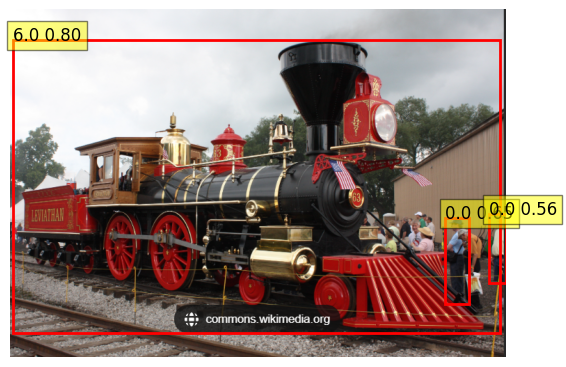

In [42]:
#Q7 How can you change the confidence threshold for YOLO object detection and filter out low-confidence  predictions?


from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model = YOLO("yolov8n.pt")  


image_path = "Screenshot 2024-02-16 224952.png"  
image = cv2.imread(image_path)

confidence_threshold = 0.5

results = model.predict(image, conf=confidence_threshold)


for result in results:
    boxes = result.boxes.xyxy  
    scores = result.boxes.conf   
    labels = result.boxes.cls     

    for i in range(len(boxes)):
        box = boxes[i].numpy()  
        score = scores[i].item()  
        label = labels[i].item()  
        
        if score > confidence_threshold:  
            print(f"Detected: {label}, Confidence: {score:.2f}, Box: {box}")

            
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                                fill=False, color='red', linewidth=2))
            plt.text(box[0], box[1], f'{label} {score:.2f}', 
                     bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()



C:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5439 - loss: 0.6933 - val_accuracy: 0.5500 - val_loss: 0.6940
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5410 - loss: 0.6910 - val_accuracy: 0.5400 - val_loss: 0.6934
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5182 - loss: 0.6933 - val_accuracy: 0.5300 - val_loss: 0.6941
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5435 - loss: 0.6871 - val_accuracy: 0.5450 - val_loss: 0.6940
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5475 - loss: 0.6861 - val_accuracy: 0.5450 - val_loss: 0.6937
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 0.6938 - val_accuracy: 0.5200 - val_loss: 0.6939
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5365 - loss: 0.6896 - val_accuracy: 0.5250 - val_loss: 0.6943
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5253 - loss: 0.6870 - val_accuracy: 0.5300 - val_loss:

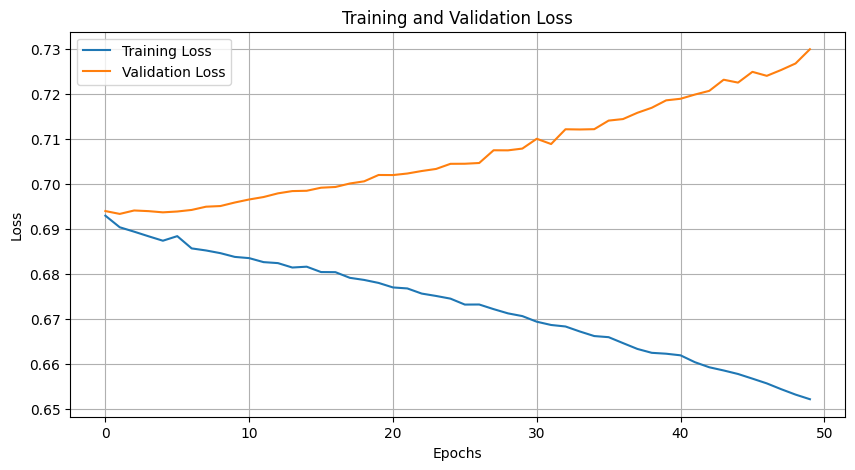

In [43]:
#Q8 How do you plot the training and validation loss curves for model evaluation


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X = np.random.rand(1000, 10)  
y = np.random.randint(0, 2, size=(1000,))


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


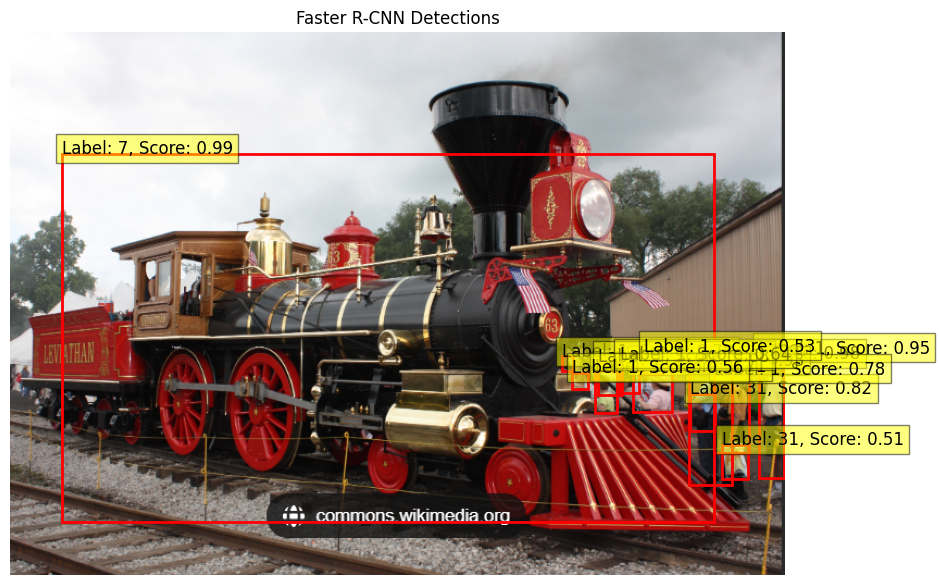

In [45]:
#Q10 How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster RCNN

import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Load the Faster R-CNN model with a ResNet50-FPN backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load an image (replace with your local image path)
image_path = "Screenshot 2024-02-16 224952.png"  # Replace with your local image path
img = Image.open(image_path).convert("RGB")

# Transform the image to tensor and normalize
image_tensor = F.to_tensor(img).unsqueeze(0)  # Add a batch dimension

# Perform inference on the image
with torch.no_grad():  # Disable gradient calculation for inference
    predictions = model(image_tensor)  # Run inference

# Set a confidence threshold for filtering predictions
confidence_threshold = 0.5

# Create a figure to display the results
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Process predictions and draw bounding boxes with confidence scores
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].numpy()
    label = predictions[0]['labels'][i].item()
    score = predictions[0]['scores'][i].item()

    if score > confidence_threshold:  # Only consider predictions above the confidence threshold
        # Draw bounding box
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                            fill=False, color='red', linewidth=2))
        plt.text(box[0], box[1], f'Label: {label}, Score: {score:.2f}',
                 bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

# Show the plot with bounding boxes and confidence scores
plt.axis('off')
plt.title('Faster R-CNN Detections')
plt.show()


In [ ]:
#Q11  How can you save the inference results (with bounding boxes) as a new image after performing detection using YOLO ?

from ultralytics import YOLO
import cv2
import os

# Load a pretrained YOLOv8 model (you can use 'yolov8n.pt' or your own trained model)
model = YOLO("yolov8n.pt")  # Ensure this model file exists in your directory

# Define the path to your local folder containing images
image_folder = "path/to/your/image/folder"  # Replace with your folder path
output_folder = "path/to/save/annotated/images"  # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all images in the specified folder
for image_name in os.listdir(image_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
        # Load the image
        img_path = os.path.join(image_folder, image_name)
        img = cv2.imread(img_path)

        # Perform inference on the image
        results = model(img)  # Run inference

        # Annotate the image with bounding boxes and labels
        annotated_img = results[0].plot()  # Get the annotated image with bounding boxes

        # Save the annotated image to the output folder
        output_path = os.path.join(output_folder, f"annotated_{image_name}")
        cv2.imwrite(output_path, annotated_img)  # Save the annotated image

        print(f"Saved annotated image: {output_path}")

